In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

final_train = train.copy()
final_test = test.copy()

In [3]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [4]:
train.columns

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

## About VCL1 ~ VCL16

In [5]:
VCLS = [x for x in train.columns if x.startswith('VCL')]
for column in VCLS:
    mean_vcl = train.groupby(column)['nerdiness'].agg('mean')
    display(mean_vcl)
    final_train[column] = train[column].map(mean_vcl)
    final_test[column] = test[column].map(mean_vcl)

VCL1
0    0.469355
1    0.557163
Name: nerdiness, dtype: float64

VCL2
0    0.428936
1    0.564123
Name: nerdiness, dtype: float64

VCL3
0    0.496106
1    0.604637
Name: nerdiness, dtype: float64

VCL4
0    0.430380
1    0.557552
Name: nerdiness, dtype: float64

VCL5
0    0.445570
1    0.559536
Name: nerdiness, dtype: float64

VCL6
0    0.547971
1    0.602758
Name: nerdiness, dtype: float64

VCL7
0    0.544852
1    0.581638
Name: nerdiness, dtype: float64

VCL8
0    0.526920
1    0.587876
Name: nerdiness, dtype: float64

VCL9
0    0.551315
1    0.584325
Name: nerdiness, dtype: float64

VCL10
0    0.493171
1    0.556307
Name: nerdiness, dtype: float64

VCL11
0    0.536068
1    0.598429
Name: nerdiness, dtype: float64

VCL12
0    0.536299
1    0.618263
Name: nerdiness, dtype: float64

VCL13
0    0.456042
1    0.584129
Name: nerdiness, dtype: float64

VCL14
0    0.417910
1    0.567572
Name: nerdiness, dtype: float64

VCL15
0    0.458472
1    0.557508
Name: nerdiness, dtype: float64

VCL16
0    0.47079
1    0.55517
Name: nerdiness, dtype: float64

In [6]:
final_train.iloc[:5, 41:57]

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
0,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.544852,0.526920,0.551315,0.556307,0.536068,0.536299,0.456042,0.567572,0.557508,0.55517
1,0.557163,0.564123,0.604637,0.557552,0.559536,0.547971,0.581638,0.526920,0.551315,0.556307,0.536068,0.536299,0.584129,0.567572,0.557508,0.55517
2,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.581638,0.587876,0.551315,0.556307,0.536068,0.536299,0.584129,0.567572,0.557508,0.55517
3,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.544852,0.526920,0.551315,0.556307,0.536068,0.536299,0.584129,0.567572,0.557508,0.55517
4,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.544852,0.587876,0.551315,0.556307,0.536068,0.536299,0.456042,0.567572,0.458472,0.55517


## About Q1 ~ Q26

In [7]:
Qs = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
     'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12',
     'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
     'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
     'Q25', 'Q26']

<AxesSubplot:>

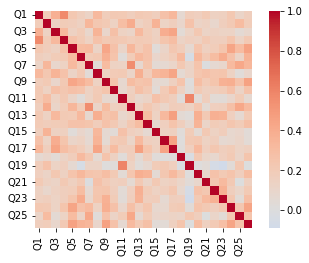

In [8]:
correlations = train[Qs].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [9]:
train['Qs_Mach'] = train[Qs].mean(axis = 1)
test['Qs_Mach'] = test[Qs].mean(axis = 1)

<AxesSubplot:xlabel='Qs_Mach', ylabel='Count'>

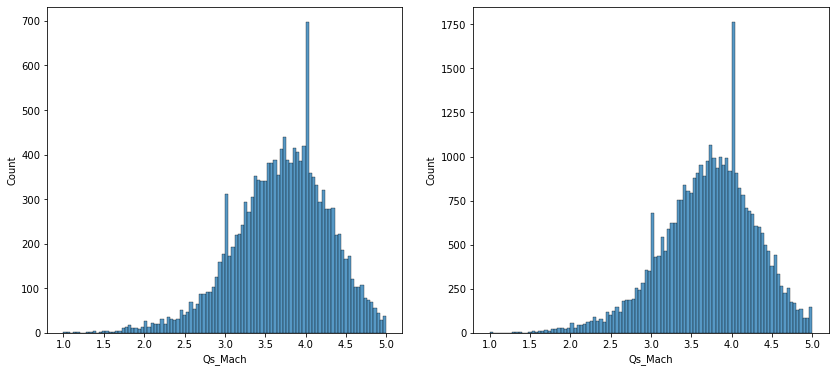

In [10]:
f,ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(train, x="Qs_Mach", bins=100, ax=ax[0])
sns.histplot(test, x="Qs_Mach", bins=100, ax=ax[1])

In [11]:
final_train['Qs_Mach'] = train['Qs_Mach']
final_test['Qs_Mach'] = test['Qs_Mach']

In [12]:
display(train.iloc[:, 1:10].describe())
display(train.iloc[:, 11:20].describe())
display(train.iloc[:, 21:27].describe())

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
count,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000
mean,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418
std,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,14941.000000,14933.000000,14960.000000,14964.000000,14955.000000,14967.000000,14963.000000,14937.000000,14947.000000
mean,3.123419,3.798835,3.701404,3.723603,3.021130,3.433621,3.941121,3.903461,3.385763
std,1.569761,1.233672,1.321331,1.160248,1.514791,1.399485,1.136492,1.322643,1.546368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


,Q21,Q22,Q23,Q24,Q25,Q26
count,14961.000000,14962.000000,14950.000000,14939.000000,14956.000000,14932.000000
mean,2.968384,2.412846,3.835452,4.296740,3.151444,4.161465
std,1.609673,1.375515,1.360530,0.919564,1.376888,1.030046
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,4.000000,2.000000,4.000000
50%,3.000000,2.000000,4.000000,5.000000,3.000000,4.000000
75%,5.000000,3.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
train_Qs = train.iloc[:, 1:27]

In [14]:
train_Qs['nerdiness'] = train['nerdiness']

In [15]:
for c in Qs:
    mean_df = train_Qs.groupby(c)['nerdiness'].agg('mean')
    final_train[c] = train[c].map(mean_df)
    final_test[c] = test[c].map(mean_df)

In [16]:
final_train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach
0,0,0.219430,0.684909,0.645424,0.689224,0.270300,0.580272,0.649525,0.664648,0.287443,...,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,3.653846
1,1,0.549147,0.490676,0.505430,0.576165,0.538382,0.754382,0.494185,0.537294,0.460687,...,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.269231
2,2,0.549147,0.684909,0.645424,0.576165,0.490014,0.754382,0.649525,0.664648,0.541905,...,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1,3.692308
3,3,0.549147,0.490676,0.505430,0.382335,0.538382,0.427424,0.435168,0.664648,0.460687,...,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,3.500000
4,4,0.549147,0.490676,0.505430,0.576165,0.490014,0.427424,0.494185,0.413060,0.460687,...,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0,3.461538


## TIPI1 ~ TIPI10

In [17]:
TIPIS = [x for x in train.columns if x.startswith('TIPI')]
for column in TIPIS:
    mean_df = train.groupby(column)['nerdiness'].agg('mean')
    display(mean_df)
    final_train[column] = train[column].map(mean_df)
    final_test[column] = test[column].map(mean_df)

TIPI1
1.0    0.647515
2.0    0.590264
3.0    0.509051
4.0    0.490276
5.0    0.524272
Name: nerdiness, dtype: float64

TIPI2
1.0    0.556116
2.0    0.532758
3.0    0.547437
4.0    0.572988
5.0    0.588448
Name: nerdiness, dtype: float64

TIPI3
1.0    0.526846
2.0    0.563307
3.0    0.532462
4.0    0.575373
5.0    0.584342
Name: nerdiness, dtype: float64

TIPI4
1.0    0.536932
2.0    0.537153
3.0    0.532669
4.0    0.588039
5.0    0.590032
Name: nerdiness, dtype: float64

TIPI5
1.0    0.578125
2.0    0.588367
3.0    0.531244
4.0    0.549323
5.0    0.585542
Name: nerdiness, dtype: float64

TIPI6
1.0    0.441379
2.0    0.529609
3.0    0.516907
4.0    0.571829
5.0    0.611198
Name: nerdiness, dtype: float64

TIPI7
1.0    0.591652
2.0    0.557346
3.0    0.527097
4.0    0.560243
5.0    0.601787
Name: nerdiness, dtype: float64

TIPI8
1.0    0.547501
2.0    0.550339
3.0    0.536615
4.0    0.580372
5.0    0.604298
Name: nerdiness, dtype: float64

TIPI9
1.0    0.608624
2.0    0.565574
3.0    0.545113
4.0    0.550051
5.0    0.558732
Name: nerdiness, dtype: float64

TIPI10
1.0    0.618666
2.0    0.573662
3.0    0.489265
4.0    0.457143
5.0    0.596107
Name: nerdiness, dtype: float64

In [18]:
final_train.iloc[:, 31:]

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach
0,0.490276,0.547437,0.584342,0.536932,0.531244,0.611198,0.601787,0.536615,0.558732,0.489265,...,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,3.653846
1,0.490276,0.532758,0.532462,0.590032,0.531244,0.529609,0.601787,0.547501,0.565574,0.573662,...,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.269231
2,0.647515,0.532758,0.532462,0.536932,0.585542,0.611198,0.527097,0.580372,0.558732,0.573662,...,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1,3.692308
3,0.509051,0.547437,0.532462,0.588039,0.585542,0.516907,0.560243,0.580372,0.545113,0.489265,...,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,3.500000
4,0.509051,0.547437,0.575373,0.588039,0.549323,0.571829,0.527097,0.580372,0.545113,0.573662,...,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0,3.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.590264,0.532758,0.575373,0.532669,0.531244,0.611198,0.527097,0.536615,0.545113,0.489265,...,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0,3.346154
14996,0.509051,0.532758,0.575373,0.590032,0.549323,0.516907,0.560243,0.547501,0.565574,0.573662,...,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1,4.038462
14997,0.647515,0.547437,0.563307,0.590032,0.578125,0.611198,0.527097,0.536615,0.608624,0.618666,...,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1,4.615385
14998,0.647515,0.556116,0.532462,0.590032,0.549323,0.611198,0.601787,0.580372,0.565574,0.618666,...,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0,4.115385


## About age

In [19]:
train['age_cat'] = 0
test['age_cat'] = 0

train.loc[train['age'] < 10, 'age_cat'] = 0
train.loc[(10 <= train['age']) & (train['age'] < 20), 'age_cat'] = 1
train.loc[(20 <= train['age']) & (train['age'] < 30), 'age_cat'] = 2
train.loc[(30 <= train['age']) & (train['age'] < 40), 'age_cat'] = 3
train.loc[(40 <= train['age']) & (train['age'] < 50), 'age_cat'] = 4
train.loc[(50 <= train['age']) & (train['age'] < 60), 'age_cat'] = 5
train.loc[(60 <= train['age']) & (train['age'] < 70), 'age_cat'] = 6
train.loc[(70 <= train['age']), 'age_cat'] = 7

test.loc[test['age'] < 10, 'age_cat'] = 0
test.loc[(10 <= test['age']) & (test['age'] < 20), 'age_cat'] = 1
test.loc[(20 <= test['age']) & (test['age'] < 30), 'age_cat'] = 2
test.loc[(30 <= test['age']) & (test['age'] < 40), 'age_cat'] = 3
test.loc[(40 <= test['age']) & (test['age'] < 50), 'age_cat'] = 4
test.loc[(50 <= test['age']) & (test['age'] < 60), 'age_cat'] = 5
test.loc[(60 <= test['age']) & (test['age'] < 70), 'age_cat'] = 6
test.loc[(70 <= test['age']), 'age_cat'] = 7

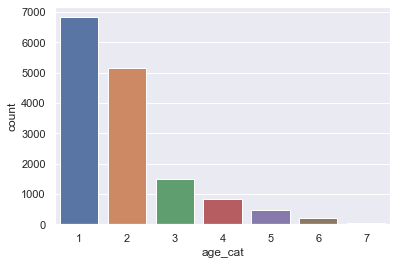

In [20]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="age_cat", data=train)

In [21]:
display(train.groupby('age_cat')['nerdiness'].agg('mean').reset_index())

,age_cat,nerdiness
0,1,0.564478
1,2,0.559000
2,3,0.558607
3,4,0.523114
4,5,0.427015
5,6,0.445545
6,7,0.410256


In [22]:
train['age_cat'] = 0
test['age_cat'] = 0

train.loc[train['age'] < 10, 'age_cat'] = 0
train.loc[(10 <= train['age']) & (train['age'] < 20), 'age_cat'] = 1
train.loc[(20 <= train['age']) & (train['age'] < 30), 'age_cat'] = 2
train.loc[(30 <= train['age']) & (train['age'] < 40), 'age_cat'] = 3
train.loc[(40 <= train['age']) & (train['age'] < 50), 'age_cat'] = 4

test.loc[test['age'] < 10, 'age_cat'] = 0
test.loc[(10 <= test['age']) & (test['age'] < 20), 'age_cat'] = 1
test.loc[(20 <= test['age']) & (test['age'] < 30), 'age_cat'] = 2
test.loc[(30 <= test['age']) & (test['age'] < 40), 'age_cat'] = 3
test.loc[(40 <= test['age']) & (test['age'] < 50), 'age_cat'] = 4

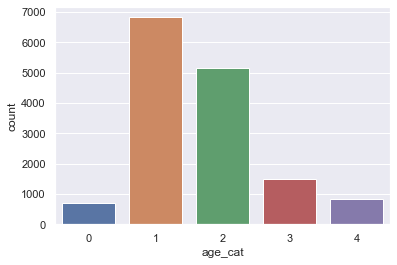

In [23]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="age_cat", data=train)

In [24]:
display(train.groupby('age_cat')['nerdiness'].agg('mean').reset_index())

,age_cat,nerdiness
0,0,0.431429
1,1,0.564478
2,2,0.559000
3,3,0.558607
4,4,0.523114


In [25]:
mean_age = train.groupby('age_cat')['nerdiness'].agg('mean')
display(mean_age)
final_train['age_cat'] = train['age_cat'].map(mean_age)
final_test['age_cat'] = test['age_cat'].map(mean_age)

age_cat
0    0.431429
1    0.564478
2    0.559000
3    0.558607
4    0.523114
Name: nerdiness, dtype: float64

In [26]:
final_train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach,age_cat
0,0,0.219430,0.684909,0.645424,0.689224,0.270300,0.580272,0.649525,0.664648,0.287443,...,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,3.653846,0.559000
1,1,0.549147,0.490676,0.505430,0.576165,0.538382,0.754382,0.494185,0.537294,0.460687,...,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.269231,0.523114
2,2,0.549147,0.684909,0.645424,0.576165,0.490014,0.754382,0.649525,0.664648,0.541905,...,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1,3.692308,0.523114
3,3,0.549147,0.490676,0.505430,0.382335,0.538382,0.427424,0.435168,0.664648,0.460687,...,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,3.500000,0.564478
4,4,0.549147,0.490676,0.505430,0.576165,0.490014,0.427424,0.494185,0.413060,0.460687,...,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0,3.461538,0.564478


## About familysize

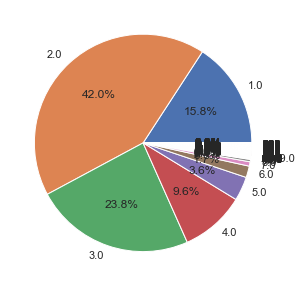

In [29]:
labels, frequencies = np.unique(train.familysize.values, return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(frequencies, labels = labels, autopct= '%1.1f%%')
plt.show()

[2373, 6303, 3573, 1445, 987]


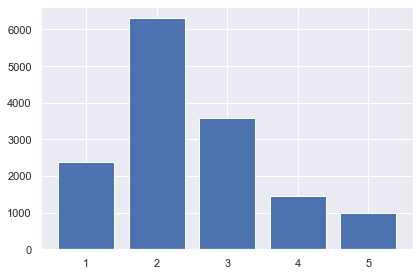

In [30]:
train.familysize = train.familysize.apply(lambda x : 5 if x >= 5 else x)
plot_dict = train.loc[:,'familysize'].value_counts().to_dict()
x_values = sorted(plot_dict.keys())
y_values = [plot_dict[x] for x in x_values]
print(y_values)
plt.bar(x_values,y_values)
plt.tight_layout()
plt.show()

In [31]:
mean_familysize = train.groupby('familysize')['nerdiness'].agg('mean')
display(mean_familysize)
final_train['familysize'] = train['familysize'].map(mean_familysize)
final_test['familysize'] = test['familysize'].map(mean_familysize)

familysize
1.0    0.573536
2.0    0.565604
3.0    0.544640
4.0    0.547405
5.0    0.489362
Name: nerdiness, dtype: float64

In [32]:
final_train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach,age_cat
0,0,0.219430,0.684909,0.645424,0.689224,0.270300,0.580272,0.649525,0.664648,0.287443,...,2.0,12.0,4.0,2.0,1.0,0.547405,2.0,1,3.653846,0.559000
1,1,0.549147,0.490676,0.505430,0.576165,0.538382,0.754382,0.494185,0.537294,0.460687,...,1.0,2.0,1.0,1.0,2.0,0.547405,2.0,1,3.269231,0.523114
2,2,0.549147,0.684909,0.645424,0.576165,0.490014,0.754382,0.649525,0.664648,0.541905,...,1.0,2.0,2.0,2.0,3.0,0.547405,2.0,1,3.692308,0.523114
3,3,0.549147,0.490676,0.505430,0.382335,0.538382,0.427424,0.435168,0.664648,0.460687,...,2.0,1.0,1.0,2.0,1.0,0.565604,2.0,1,3.500000,0.564478
4,4,0.549147,0.490676,0.505430,0.576165,0.490014,0.427424,0.494185,0.413060,0.460687,...,2.0,12.0,1.0,2.0,1.0,0.573536,2.0,0,3.461538,0.564478


## About elapse columns

In [34]:
elapse_columns = ['introelapse', 'testelapse', 'surveyelapse']
train_elapse = train.loc[:,elapse_columns]
test_elapse = test.loc[:,elapse_columns]
display(train_elapse.head())
display(train_elapse.describe())

,introelapse,testelapse,surveyelapse
0,3,553,6
1,5,85,120
2,9,108,100
3,2,121,139
4,3,640,216


,introelapse,testelapse,surveyelapse
count,15000.000000,15000.000000,1.500000e+04
mean,767.137733,387.965667,2.787959e+03
std,13835.948037,8513.031610,1.785955e+05
min,1.000000,1.000000,3.000000e+00
25%,4.000000,82.000000,1.260000e+02
50%,10.000000,106.000000,1.640000e+02
75%,36.000000,140.000000,2.170000e+02
max,855030.000000,474572.000000,1.516699e+07


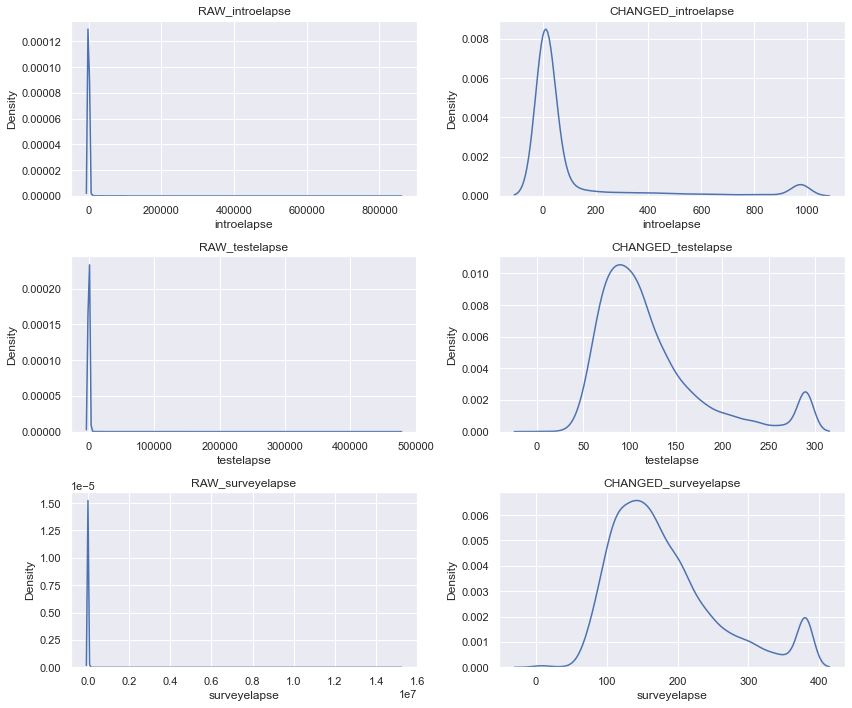

In [35]:
outlier_columns = elapse_columns
fig,ax = plt.subplots(3,2, figsize=(12,10))
changed_train_elapse = train_elapse.loc[:,outlier_columns].apply(lambda x: x.clip(x.quantile(.00), x.quantile(.95)), axis=0)
for i in range(6):
    x_num = i//2
    y_num = i%2
    column = outlier_columns[i//2]
    if i %2 == 0:
        ax[x_num,y_num] = sns.kdeplot(train_elapse.loc[:,column], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('RAW_'+column)
    else:
        
        ax[x_num,y_num] = sns.kdeplot(changed_train_elapse.loc[:,column], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('CHANGED_'+column)
plt.tight_layout()
plt.show()

train_elapse.loc[:,outlier_columns] = changed_train_elapse

In [36]:
changed_train_elapse = np.log1p(train_elapse)

<AxesSubplot:xlabel='introelapse', ylabel='Density'>

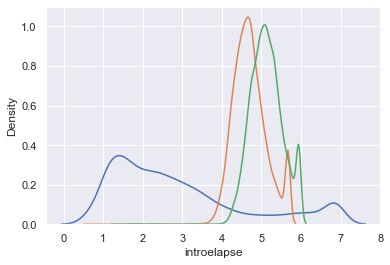

In [37]:
sns.kdeplot(changed_train_elapse.iloc[:, 0])
sns.kdeplot(changed_train_elapse.iloc[:, 1])
sns.kdeplot(changed_train_elapse.iloc[:, 2])

In [38]:
changed_train_elapse

,introelapse,testelapse,surveyelapse
0,1.386294,5.673323,1.945910
1,1.791759,4.454347,4.795791
2,2.302585,4.691348,4.615121
3,1.098612,4.804021,4.941642
4,1.386294,5.673323,5.379897
...,...,...,...
14995,2.564949,4.644391,5.087596
14996,3.465736,4.672829,5.192957
14997,2.890372,4.644391,5.129899
14998,2.708050,4.234107,4.700480


In [39]:
final_train.loc[:,elapse_columns] = changed_train_elapse

In [40]:
test_elapse.loc[:,outlier_columns] = test_elapse.loc[:,outlier_columns].apply(lambda x: x.clip(x.quantile(.00), x.quantile(.95)), axis=0)
final_test.loc[:,elapse_columns] = np.log1p(test_elapse)

In [41]:
final_train.iloc[:5, 28:31]

,introelapse,testelapse,surveyelapse
0,1.386294,5.673323,1.945910
1,1.791759,4.454347,4.795791
2,2.302585,4.691348,4.615121
3,1.098612,4.804021,4.941642
4,1.386294,5.673323,5.379897


In [42]:
final_test.iloc[:5, 28:31]

,introelapse,testelapse,surveyelapse
0,2.302585,4.744932,5.497168
1,2.944439,4.682131,5.332719
2,1.609438,4.477337,5.257495
3,6.961722,5.049856,5.556828
4,3.218876,5.099866,5.669881


## About other features

In [44]:
train.columns[57:69]

Index(['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'voted', 'married', 'familysize', 'ASD'],
      dtype='object')

<AxesSubplot:xlabel='ASD', ylabel='count'>

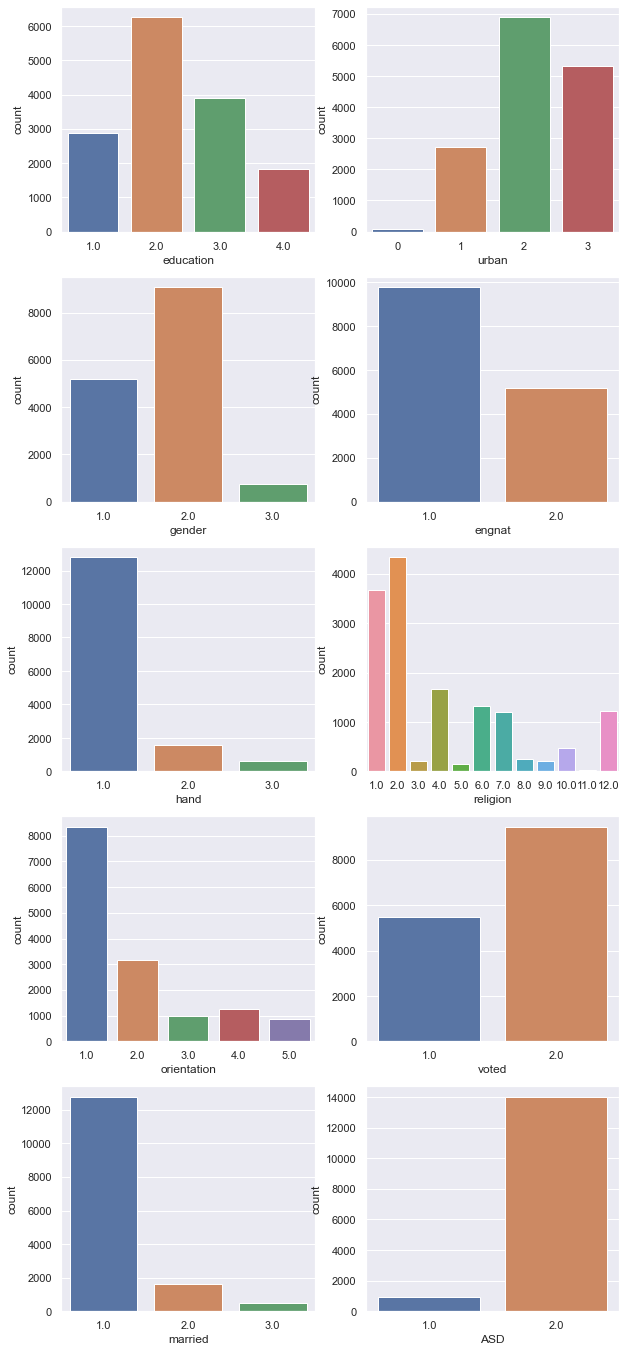

In [45]:
f, ax = plt.subplots(5, 2, figsize=(10, 24))
sns.countplot(x="education", data=train, ax=ax[0][0])
sns.countplot(x="urban", data=train, ax=ax[0][1])
sns.countplot(x="gender", data=train, ax=ax[1][0])
sns.countplot(x="engnat", data=train, ax=ax[1][1])
sns.countplot(x="hand", data=train, ax=ax[2][0])
sns.countplot(x="religion", data=train, ax=ax[2][1])
sns.countplot(x="orientation", data=train, ax=ax[3][0])
sns.countplot(x="voted", data=train, ax=ax[3][1])
sns.countplot(x="married", data=train, ax=ax[4][0])
sns.countplot(x="ASD", data=train, ax=ax[4][1])

In [46]:
other_features = ['education', 'urban', 'gender', 'engnat', 'hand',
                 'religion', 'orientation', 'voted', 'married', 'ASD']

In [47]:
for column in other_features:
    mean_df = train.groupby(column)['nerdiness'].agg('mean')
    display(mean_df)
    final_train[column] = train[column].map(mean_df)
    final_test[column] = test[column].map(mean_df)

education
1.0    0.591922
2.0    0.543273
3.0    0.550553
4.0    0.533187
Name: nerdiness, dtype: float64

urban
0    0.524390
1    0.565089
2    0.571283
3    0.525160
Name: nerdiness, dtype: float64

gender
1.0    0.545191
2.0    0.550584
3.0    0.652949
Name: nerdiness, dtype: float64

engnat
1.0    0.573883
2.0    0.515462
Name: nerdiness, dtype: float64

hand
1.0    0.552290
2.0    0.550968
3.0    0.596059
Name: nerdiness, dtype: float64

religion
1.0     0.565894
2.0     0.597924
3.0     0.495370
4.0     0.488053
5.0     0.621795
6.0     0.548975
7.0     0.522538
8.0     0.422764
9.0     0.649289
10.0    0.424431
11.0    0.285714
12.0    0.567721
Name: nerdiness, dtype: float64

orientation
1.0    0.521066
2.0    0.600253
3.0    0.578521
4.0    0.617225
5.0    0.608945
Name: nerdiness, dtype: float64

voted
1.0    0.562683
2.0    0.549084
Name: nerdiness, dtype: float64

married
1.0    0.560104
2.0    0.515796
3.0    0.529865
Name: nerdiness, dtype: float64

ASD
1.0    0.664114
2.0    0.546760
Name: nerdiness, dtype: float64

In [48]:
final_train.iloc[:, 57:].head()

,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach,age_cat
0,0.543273,0.565089,0.652949,0.573883,20,0.550968,0.567721,0.617225,0.549084,0.560104,0.547405,0.54676,1,3.653846,0.559000
1,0.533187,0.571283,0.550584,0.573883,49,0.552290,0.597924,0.521066,0.562683,0.515796,0.547405,0.54676,1,3.269231,0.523114
2,0.543273,0.565089,0.545191,0.515462,43,0.552290,0.597924,0.600253,0.549084,0.529865,0.547405,0.54676,1,3.692308,0.523114
3,0.591922,0.525160,0.545191,0.573883,17,0.550968,0.565894,0.521066,0.549084,0.560104,0.565604,0.54676,1,3.500000,0.564478
4,0.591922,0.571283,0.550584,0.515462,18,0.550968,0.567721,0.521066,0.549084,0.560104,0.573536,0.54676,0,3.461538,0.564478


## Drop data

In [50]:
final_train.shape

(15000, 72)

In [51]:
train.iloc[:5, 28:31]

,introelapse,testelapse,surveyelapse
0,3,553,6
1,5,85,120
2,9,108,100
3,2,121,139
4,3,640,216


In [52]:
final_train.iloc[:5, 0:20]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,0,0.219430,0.684909,0.645424,0.689224,0.270300,0.580272,0.649525,0.664648,0.287443,0.462615,0.699533,0.695997,0.666609,0.692869,0.744246,0.653422,0.651841,0.378904,0.650471
1,1,0.549147,0.490676,0.505430,0.576165,0.538382,0.754382,0.494185,0.537294,0.460687,0.462615,0.407196,0.542219,0.666609,0.461583,0.395232,0.458352,0.560285,0.643367,0.432265
2,2,0.549147,0.684909,0.645424,0.576165,0.490014,0.754382,0.649525,0.664648,0.541905,0.523798,0.491908,0.695997,0.666609,0.692869,0.395232,0.540291,0.651841,0.476384,0.650471
3,3,0.549147,0.490676,0.505430,0.382335,0.538382,0.427424,0.435168,0.664648,0.460687,0.523798,0.699533,0.411451,0.449799,0.572022,0.598074,0.458352,0.560285,0.643367,0.544220
4,4,0.549147,0.490676,0.505430,0.576165,0.490014,0.427424,0.494185,0.413060,0.460687,0.523798,0.574088,0.542219,0.494763,0.692869,0.744246,0.458352,0.560285,0.378904,0.544220


In [53]:
final_train.iloc[:5, 20:40]

,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9
0,0.691358,0.459159,0.703259,0.362924,0.653106,0.392596,0.259067,USA,1.386294,5.673323,1.945910,0.490276,0.547437,0.584342,0.536932,0.531244,0.611198,0.601787,0.536615,0.558732
1,0.480010,0.459159,0.463581,0.657490,0.376832,0.515755,0.668271,USA,1.791759,4.454347,4.795791,0.490276,0.532758,0.532462,0.590032,0.531244,0.529609,0.601787,0.547501,0.565574
2,0.413326,0.514038,0.463581,0.445742,0.494077,0.515755,0.668271,NLD,2.302585,4.691348,4.615121,0.647515,0.532758,0.532462,0.536932,0.585542,0.611198,0.527097,0.580372,0.558732
3,0.480010,0.552567,0.639758,0.466042,0.494077,0.592015,0.322870,USA,1.098612,4.804021,4.941642,0.509051,0.547437,0.532462,0.588039,0.585542,0.516907,0.560243,0.580372,0.545113
4,0.413326,0.563845,0.543539,0.466042,0.494077,0.592015,0.503247,ITA,1.386294,5.673323,5.379897,0.509051,0.547437,0.575373,0.588039,0.549323,0.571829,0.527097,0.580372,0.545113


In [54]:
final_train.iloc[:5, 40:60]

,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender
0,0.489265,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.544852,0.526920,0.551315,0.556307,0.536068,0.536299,0.456042,0.567572,0.557508,0.55517,0.543273,0.565089,0.652949
1,0.573662,0.557163,0.564123,0.604637,0.557552,0.559536,0.547971,0.581638,0.526920,0.551315,0.556307,0.536068,0.536299,0.584129,0.567572,0.557508,0.55517,0.533187,0.571283,0.550584
2,0.573662,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.581638,0.587876,0.551315,0.556307,0.536068,0.536299,0.584129,0.567572,0.557508,0.55517,0.543273,0.565089,0.545191
3,0.489265,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.544852,0.526920,0.551315,0.556307,0.536068,0.536299,0.584129,0.567572,0.557508,0.55517,0.591922,0.525160,0.545191
4,0.573662,0.557163,0.564123,0.496106,0.557552,0.559536,0.547971,0.544852,0.587876,0.551315,0.556307,0.536068,0.536299,0.456042,0.567572,0.458472,0.55517,0.591922,0.571283,0.550584


In [55]:
final_train.iloc[:5, 60:72]

,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach,age_cat
0,0.573883,20,0.550968,0.567721,0.617225,0.549084,0.560104,0.547405,0.54676,1,3.653846,0.559000
1,0.573883,49,0.552290,0.597924,0.521066,0.562683,0.515796,0.547405,0.54676,1,3.269231,0.523114
2,0.515462,43,0.552290,0.597924,0.600253,0.549084,0.529865,0.547405,0.54676,1,3.692308,0.523114
3,0.573883,17,0.550968,0.565894,0.521066,0.549084,0.560104,0.565604,0.54676,1,3.500000,0.564478
4,0.515462,18,0.550968,0.567721,0.521066,0.549084,0.560104,0.573536,0.54676,0,3.461538,0.564478


In [56]:
drop_columns = ['index', 'country', 'age']

In [57]:
final_train.drop(drop_columns, axis=1, inplace=True)

In [58]:
final_test.drop(drop_columns, axis=1, inplace=True)

In [60]:
final_train.to_csv("../data/minseok_EDA2_train.csv", index=False)
final_test.to_csv("../data/minseok_EDA2_test.csv", index=False)